<a href="https://colab.research.google.com/github/AbdAllAh950/Machine-Learning/blob/main/Task_01_%D0%98%D1%81%D1%81%D0%B0_%D0%90%D0%B1%D0%B4%D0%B0%D0%BB%D0%BB%D0%B0_%D0%A1%D0%B0%D0%B9%D0%B5%D0%B4_%D0%90%D0%BB%D0%B8_Group_J4133.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Setting Up the Environment**

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, log_loss, roc_curve, precision_recall_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/sample_data/bioresponse.csv')  # Replace this path with the actual path

**Data Preparation**

In [ ]:
# Separate features (X) and target (y)
X = data.drop(columns='Activity')
y = data['Activity']

# Split the data into training and testing sets (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

**Train the Classifiers**

In [ ]:
# 1. Small Decision Tree
small_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
small_tree.fit(X_train, y_train)
y_pred_small_tree = small_tree.predict(X_test)
y_pred_prob_small_tree = small_tree.predict_proba(X_test)[:, 1]

In [ ]:
# 2. Deep Decision Tree
deep_tree = DecisionTreeClassifier(max_depth=None, random_state=42)
deep_tree.fit(X_train, y_train)
y_pred_deep_tree = deep_tree.predict(X_test)
y_pred_prob_deep_tree = deep_tree.predict_proba(X_test)[:, 1]

In [ ]:
# 3. Random Forest on Small Trees
small_rf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
small_rf.fit(X_train, y_train)
y_pred_small_rf = small_rf.predict(X_test)
y_pred_prob_small_rf = small_rf.predict_proba(X_test)[:, 1]

In [ ]:
# 4. Random Forest on Deep Trees
deep_rf = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
deep_rf.fit(X_train, y_train)
y_pred_deep_rf = deep_rf.predict(X_test)
y_pred_prob_deep_rf = deep_rf.predict_proba(X_test)[:, 1]

**Calculate Metrics**

In [ ]:
def display_metrics(y_true, y_pred, y_pred_prob, model_name):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    logloss = log_loss(y_true, y_pred_prob)

    print(f"Metrics for {model_name}:")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"Log Loss: {logloss:.2f}\n")

# Display metrics for each model
display_metrics(y_test, y_pred_small_tree, y_pred_prob_small_tree, "Small Decision Tree")
display_metrics(y_test, y_pred_deep_tree, y_pred_prob_deep_tree, "Deep Decision Tree")
display_metrics(y_test, y_pred_small_rf, y_pred_prob_small_rf, "Random Forest on Small Trees")
display_metrics(y_test, y_pred_deep_rf, y_pred_prob_deep_rf, "Random Forest on Deep Trees")

Metrics for Small Decision Tree:
Precision: 0.79
Recall: 0.80
Accuracy: 0.76
F1 Score: 0.79
Log Loss: 0.54

Metrics for Deep Decision Tree:
Precision: 0.75
Recall: 0.72
Accuracy: 0.70
F1 Score: 0.73
Log Loss: 10.72

Metrics for Random Forest on Small Trees:
Precision: 0.77
Recall: 0.76
Accuracy: 0.73
F1 Score: 0.77
Log Loss: 0.59

Metrics for Random Forest on Deep Trees:
Precision: 0.82
Recall: 0.80
Accuracy: 0.78
F1 Score: 0.81
Log Loss: 0.46



**Plot Precision-Recall and ROC Curves**

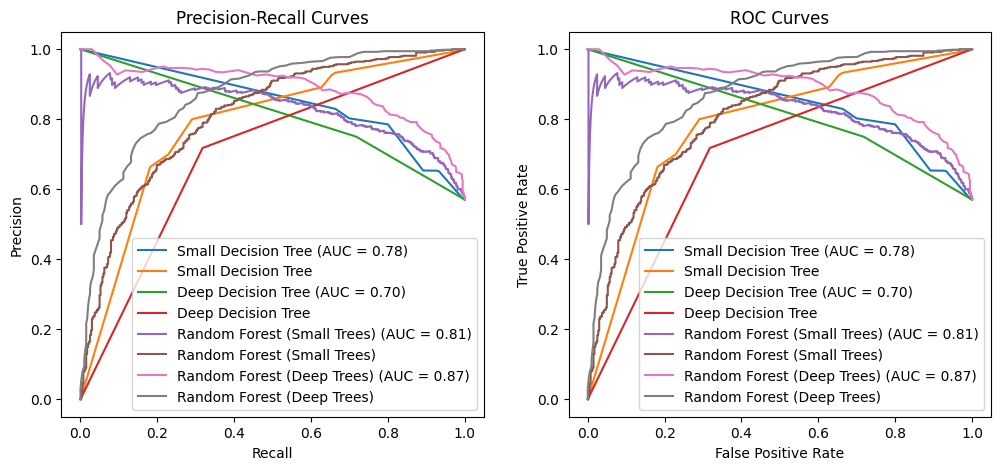

In [ ]:
def plot_curves(y_true, y_pred_prob, model_name):
    # Precision-Recall curve
    precision, recall, _ = precision_recall_curve(y_true, y_pred_prob)
    plt.plot(recall, precision, label=f"{model_name} (AUC = {roc_auc_score(y_true, y_pred_prob):.2f})")

    # ROC curve
    fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
    plt.plot(fpr, tpr, label=f"{model_name}")

# Plot for Precision-Recall
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title("Precision-Recall Curves")
plot_curves(y_test, y_pred_prob_small_tree, "Small Decision Tree")
plot_curves(y_test, y_pred_prob_deep_tree, "Deep Decision Tree")
plot_curves(y_test, y_pred_prob_small_rf, "Random Forest (Small Trees)")
plot_curves(y_test, y_pred_prob_deep_rf, "Random Forest (Deep Trees)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()

# Plot for ROC
plt.subplot(1, 2, 2)
plt.title("ROC Curves")
plot_curves(y_test, y_pred_prob_small_tree, "Small Decision Tree")
plot_curves(y_test, y_pred_prob_deep_tree, "Deep Decision Tree")
plot_curves(y_test, y_pred_prob_small_rf, "Random Forest (Small Trees)")
plot_curves(y_test, y_pred_prob_deep_rf, "Random Forest (Deep Trees)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

**Train a Classifier with High Recall (Reducing Type II Errors)**

In [ ]:
# Train a model optimized to avoid Type II errors (false negatives). You can adjust the threshold for high recall by tuning class_weight in RandomForestClassifier.
# Random forest with class weights to prioritize recall
high_recall_rf = RandomForestClassifier(n_estimators=100, class_weight={0: 1, 1: 10}, random_state=42)
high_recall_rf.fit(X_train, y_train)
y_pred_high_recall = high_recall_rf.predict(X_test)
y_pred_prob_high_recall = high_recall_rf.predict_proba(X_test)[:, 1]

# Calculate metrics for this model
display_metrics(y_test, y_pred_high_recall, y_pred_prob_high_recall, "High Recall Random Forest")

Metrics for High Recall Random Forest:
Precision: 0.84
Recall: 0.77
Accuracy: 0.79
F1 Score: 0.81
Log Loss: 0.51

